In [1]:
###################################################################
###################################################################
diff_type = 'del'
corpus = 'cejc' if diff_type=='del' else 'mpdd'

situation = 'apology'
sen_type = 'query'
###################################################################
###################################################################

In [2]:
import csv
import pandas as pd
from pprint import pprint
import numpy as np
import scipy.stats as stats
import matplotlib as plt
import matplotlib.style

jiwc = {}
files_path = [  '../sentiment_analysis/JIWC_Dictionary/ver_2018/JIWC-C_2018.csv',
                '../sentiment_analysis/JIWC_Dictionary/ver_2019/JIWC-C_2019.csv',
                '../sentiment_analysis/JIWC_Dictionary/JIWC-C_2018_2019.csv']
for path in files_path:
    with open(path,'r') as f:
        reader = csv.reader(f)
        for i,row in enumerate(reader): 
            if i == 0 :
                continue
            jiwc.setdefault(row[0],'Sadness')
            jiwc.setdefault(row[1],'Anxiety')
            jiwc.setdefault(row[2],'Anger')
            jiwc.setdefault(row[3],'Disgust')
            jiwc.setdefault(row[4],'Trust')
            jiwc.setdefault(row[5],'Surprise')
            jiwc.setdefault(row[6],'Joy')
pprint(jiwc)
        

{'': 'Sadness',
 '##': 'Sadness',
 '(': 'Disgust',
 '**': 'Anger',
 'あおり': 'Anger',
 'あげ': 'Sadness',
 'あたった': 'Surprise',
 'あった': 'Anxiety',
 'あって': 'Trust',
 'あと': 'Anxiety',
 'あなた': 'Trust',
 'あまり': 'Surprise',
 'あまりに': 'Anger',
 'あり': 'Trust',
 'ある': 'Trust',
 'い': 'Trust',
 'いい': 'Disgust',
 'いい加減な': 'Anger',
 'いう': 'Surprise',
 'いか': 'Anxiety',
 'いきなり': 'Surprise',
 'いく': 'Anxiety',
 'いくら': 'Anger',
 'いけない': 'Anxiety',
 'いじめ': 'Disgust',
 'いた': 'Disgust',
 'いた事': 'Surprise',
 'いっ': 'Joy',
 'いった': 'Joy',
 'いって': 'Trust',
 'いつ': 'Anxiety',
 'いつでも': 'Trust',
 'いつの間にか': 'Surprise',
 'いつまで': 'Anxiety',
 'いつまでも': 'Disgust',
 'いつも': 'Trust',
 'いて': 'Trust',
 'いま': 'Joy',
 'いる': 'Disgust',
 'いろいろ': 'Trust',
 'いわ': 'Disgust',
 'うち': 'Anger',
 'うつ病': 'Anxiety',
 'うまく': 'Anxiety',
 'うるさい': 'Anger',
 'おいしい': 'Joy',
 'おいて': 'Trust',
 'おかしい': 'Disgust',
 'おける': 'Trust',
 'おしゃべり': 'Joy',
 'おじい': 'Sadness',
 'おじさん': 'Disgust',
 'おっさん': 'Disgust',
 'おばさん': 'Anger',
 'お互い': 'Trust',
 'お出かけ': 'Joy'

In [3]:
def get_mrph_data(corpus, situation, method, sen_type):
    data = []
    path = f'../mrphdata/{corpus}/{situation}/{method}_{sen_type}'
    with open(path ,'r',encoding='utf-8')as f:
        reader = csv.reader(f)
        for row in reader:
            row = row[0].replace('\ufeff','').split(' ')
            data.append(row)
    return(data)

def get_jiwc_counts(data):
    freq = []
    for i , sen in enumerate(data):
        cnt = { 'Sadness':0,
                'Anxiety':0,
                'Anger':0,
                'Disgust':0,
                'Trust':0,
                'Surprise':0,
                'Joy':0}
        for j, w in enumerate(sen):
            if w in jiwc:
                cnt[jiwc[w]] +=1
        freq.append([len(sen),cnt['Sadness'],cnt['Anxiety'],cnt['Anger'],cnt['Disgust'],cnt['Trust'],cnt['Surprise'],cnt['Joy']])
    return freq

method = 'rewrited'
rewrited = get_mrph_data(corpus, situation, method, sen_type)
rewrited_freq = get_jiwc_counts(rewrited)
pprint(rewrited_freq[:100])
print()
method = 'translated'
translated = get_mrph_data(corpus, situation, method, sen_type)
translated_freq = get_jiwc_counts(translated)
pprint(translated_freq[:3])

[[18, 1, 2, 0, 0, 0, 0, 1],
 [5, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [4, 0, 0, 0, 0, 0, 0, 0],
 [6, 0, 0, 0, 0, 0, 0, 0],
 [10, 0, 0, 0, 0, 0, 1, 0],
 [21, 0, 1, 0, 0, 0, 0, 0],
 [19, 0, 2, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 0],
 [35, 0, 0, 0, 0, 1, 0, 1],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [10, 0, 0, 0, 0, 0, 0, 0],
 [59, 0, 1, 0, 0, 0, 0, 0],
 [10, 0, 1, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 0],
 [6, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [14, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 1, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0],
 [19, 0, 0, 0, 0, 0, 0, 0],
 [10, 0, 0, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [13, 0, 1, 0, 0, 1, 0, 0],
 [4, 0, 0, 0, 0, 0, 0, 0],
 [6, 0, 0, 0, 0, 0, 0, 0],
 [18, 0, 0, 0, 0, 0, 0, 0],
 [12, 0, 0, 0, 0, 0, 0, 0],
 [9, 0, 0, 0, 0, 0, 0, 0],
 [5, 0, 0, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0, 0, 0],
 [8, 0, 0, 0, 

# 最も高いemotionをその文のemotionとしてみると。。。？

In [4]:
import numpy as np
def normalize_by_nmrph(data):
    for d in data:
        for i in range(1,len(d)):
            d[i] = d[i]/d[0]
    return data
emos=['Sadness',
    'Anxiety',
    'Anger',
    'Disgust',
    'Trust',
    'Surprise',
    'Joy']
rewrited_norm_ = normalize_by_nmrph(rewrited_freq)
translated_norm_ = normalize_by_nmrph(translated_freq)
rewrited_emos = []
translated_emos = []
same_emo_idx = []
diff_emo_idx = []
for i,(r,t) in enumerate(zip(rewrited_norm_,translated_norm_)):
    r_emo = emos[np.argmax(r[1:])]
    rewrited_emos.append(r_emo)
    t_emo = emos[np.argmax(t[1:])]
    translated_emos.append(t_emo)
    if r_emo==t_emo:
        same_emo_idx.append([i,t_emo,r_emo])
    else:
        diff_emo_idx.append([i,t_emo,r_emo])
print('total_count: {}, same: {}, diff: {}'.format(len(rewrited_norm_),len(same_emo_idx),len(diff_emo_idx)))
print()
    
for i,(r,t) in enumerate(zip(rewrited_emos,translated_emos)):
    if r!=t:
        print('MT: {0:<10}  {1}'.format(t,''.join(translated[i])))
        print('HT: {0:<10}  {1}'.format(r,''.join(rewrited[i])))
        print()
#     print('MT: {0:<10}  {1}'.format(t,''.join(translated[i])))
#     print('HT: {0:<10}  {1}'.format(r,''.join(rewrited[i])))
#     print()
rewrited_emos

total_count: 419, same: 333, diff: 86

MT: Sadness     啊。。抱歉。不是因为我醉了，而是因为我真的醉了。
HT: Anxiety     呃...抱歉，我可能有点醉了，所以说出来的话可能会怪怪的。

MT: Sadness     啊。。对不起，我不知道。我可以订购吗？
HT: Surprise    啊，不好意思，我可以点餐吗？

MT: Sadness     那张脸。嗯。。抱歉。这+不管她美不美，她都很可爱。
HT: Anxiety     抱歉，我这样说可能有点过分，但是她那张脸并不是我喜欢的类型。

MT: Disgust     你知道吗？。啊。。枣子你自己去热心就好。。至于你们四个。。我很抱歉。我也可以传达自己。。老实说+只要是当前。
HT: Anxiety     不好意思，但果然还是请老师来好了。我觉得我可能不太适合。

MT: Sadness     我现在也会跟进的。。我只是打电话告诉你，我很抱歉。。求你了。在（。大槻老师+那也许今天或明天+也许今天或明天，并联系了管理部门。
HT: Trust       现在已经在追踪了。不好意思，那就再麻烦你跟他联络了。诶...大概今天或是明天会再跟大槻先生联络就可以了。

MT: Joy         啊。。抱歉。如果已经+了，我就会接受。
HT: Sadness     不好意思，我已经有一个饭团了。

MT: Sadness     是啊。。是啊。。But+there+is+something+about+national+speak+that+if+you+look+at+it。。啊。。抱歉。我只是在想，当我们谈论......。额外+额外，对吧？。用"错"字来形容也不为过吧。
HT: Anxiety     嗯...但是如果从国文的角度切入的话，你看嘛...啊，抱歉，我刚刚讲到一半才想到的。听起来可能有点像废话，但是当我们把心情或是风景记录下来的时候，真的有像考试一样有所谓的「正解」吗？

MT: Sadness     抱歉。我吃果冻就好。
HT: Anxiety     谢谢你特地带果冻来给我吃。

MT: Sadness     对不起，我不知道
HT: Anger       抱歉，我没有事先想到这件事。

MT: Joy      

['Anxiety',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Surprise',
 'Anxiety',
 'Anxiety',
 'Sadness',
 'Sadness',
 'Trust',
 'Sadness',
 'Sadness',
 'Sadness',
 'Anxiety',
 'Anxiety',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Anger',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Anxiety',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Trust',
 'Sadness',
 'Sadness',
 'Anxiety',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Trust',
 'Sadness',
 'Joy',
 'Sadness',
 'Joy',
 'Sadness',
 'Sadness',
 'Sadness',
 'Surprise',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Disgust',
 'Sadness',
 'Trust',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Anxiety',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Anxiety',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadness',
 'Sadnes

In [5]:
emo_matrics = pd.DataFrame(np.zeros([7,7]))
emo_matrics = emo_matrics.set_axis(emos,axis=0)
emo_matrics = emo_matrics.set_axis(emos,axis=1)#.add_prefix("HT_")
for r,t in zip(rewrited_emos,translated_emos):
    emo_matrics.at[t,r]+=1
emo_matrics.loc['Total'] = emo_matrics.sum(numeric_only=True)
emo_matrics.loc[:,'Total'] = emo_matrics.sum(numeric_only=True,axis=1)
emo_matrics=emo_matrics.T.add_prefix("MT_").T
emo_matrics=emo_matrics.add_prefix("HT_")

import os

os.makedirs('for_thesis/LIWC/',exist_ok=True)
emo_matrics.to_csv(f'for_thesis/LIWC/JIWC_sentence_comparison_{situation}_{sen_type}_{diff_type}.csv',encoding='utf-8-sig')
emo_matrics


,HT_Sadness,HT_Anxiety,HT_Anger,HT_Disgust,HT_Trust,HT_Surprise,HT_Joy,HT_Total
MT_Sadness,310.0,20.0,9.0,7.0,4.0,7.0,5.0,362.0
MT_Anxiety,3.0,8.0,1.0,1.0,1.0,0.0,0.0,14.0
MT_Anger,4.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0
MT_Disgust,2.0,1.0,1.0,6.0,0.0,0.0,0.0,10.0
MT_Trust,4.0,3.0,0.0,0.0,3.0,2.0,0.0,12.0
MT_Surprise,5.0,0.0,1.0,0.0,0.0,2.0,0.0,8.0
MT_Joy,4.0,0.0,0.0,0.0,1.0,0.0,2.0,7.0
MT_Total,332.0,32.0,14.0,14.0,9.0,11.0,7.0,419.0


# 正規分布かどうかチェック
シャピロ・ウィルク検定(Shapiro-Wilk test)

帰無仮説：正規分布に従う

コルモゴロフ・スミルノフ検定(Kolmogorov-Smirnov test)

帰無仮説：正規分布に従う

https://analysis-navi.com/?p=3302

In [6]:
def normalize_by_nmrph(data):
    for d in data:
        for i in range(1,len(d)):
            d[i] = d[i]/d[0]
    return data

rewrited_freq_ = normalize_by_nmrph(rewrited_freq)
translated_freq_ = normalize_by_nmrph(translated_freq)
# pprint(rewrited_freq_[:3])
rewrited_freq_ = np.array(rewrited_freq_).T
translated_freq_ = np.array(translated_freq_).T
# print(rewrited_freq_[:3])
# print(rewrited_freq_.shape)

def check_norm_dist(val):
    if val < 0.05:
        return 'NOT normal dist'
    else:
        return 'normal dist'

emos=['Sadness',
    'Anxiety',
    'Anger',
    'Disgust',
    'Trust',
    'Surprise',
    'Joy']

for i, emo in zip(range(1,len(rewrited_freq[0])),emos):
    print("=== translated ===")
    p = stats.shapiro(translated_freq_[i])[1]
    print('{0:<10}: shapiro  p value {1:<30}   {2}'.format(emo, p, check_norm_dist(p)))
    p = stats.kstest(translated_freq_[i],"norm")[1]
    print('{0:<10}: k-s test p value {1:<30}   {2}'.format(emo, p, check_norm_dist(p)))
    
    print("=== rewrited ===")
    p = stats.shapiro(rewrited_freq_[i])[1]
    print('{0:<10}: shapiro   p value {1:<30}   {2}'.format(emo, p, check_norm_dist(p)))
    p = stats.kstest(rewrited_freq_[i],"norm")[1]
    print('{0:<10}: k-s test  p value {1:<30}   {2}'.format(emo, p, check_norm_dist(p)))
    print()

# import pylab
# stats.probplot(rewrited_freq_[i], dist="norm", plot=pylab)

=== translated ===
Sadness   : shapiro  p value 2.9544556432285146e-40           NOT normal dist
Sadness   : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
Sadness   : shapiro   p value 3.3559696922115044e-41           NOT normal dist
Sadness   : k-s test  p value 2.1841929874520559e-97           NOT normal dist

=== translated ===
Anxiety   : shapiro  p value 1.2717764472672742e-40           NOT normal dist
Anxiety   : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
Anxiety   : shapiro   p value 6.871583713269678e-39            NOT normal dist
Anxiety   : k-s test  p value 2.1841929874520559e-97           NOT normal dist

=== translated ===
Anger     : shapiro  p value 6.067902610219323e-41            NOT normal dist
Anger     : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
Anger     : shapiro   p value 7.363879481965487e-40            NOT normal dist
Anger     : k-s test  p val

# 二つに有意な差があるかどうかチェック
正規分布->  parametric test

非正規分布->non-parametric test

https://www.stats-guild.com/analytics/16940


Wilcoxonの符号順位検定(Wilcoxon signed-rank test)

帰無仮説を「2群間の代表値に差がないこと」とする

https://qiita.com/s-wakaba/items/9f2bd93acb7e31a5054d

> もし，N'>25の場合は以下の統計量Zを考える．
>
> https://data-science.gr.jp/theory/tst_wilcoxon_signed_rank_test.html
>
> https://note.com/eiko_dokusho/n/n8169dc786148
>
> おそらくpythonが自動で計算してくれている。

> 両側、片側検定について
>
> https://bellcurve.jp/statistics/course/9319.html
>
> 本研究では、どちらが多いという仮定はない -> 両側


In [7]:
def check_diff(val):
    if val < 0.05:
        return 'The diff value btw MT and HT is statisticaly signigicant'
    return 'NO diff'

has_diff_idx = []
for i, emo in zip(range(1,len(rewrited_freq[0])),emos):
#     "pratt":差が0である場合を許す検定
    p1 = stats.wilcoxon(rewrited_freq_[i],translated_freq_[i],zero_method='pratt',correction=True)[1]
    print('{0:<10}: wilcoxon p value "pratt"          {1:25}  {2}'.format(emo, p1, check_diff(p1)))

#     "wilcox":差が0である場合を無視する検定
    p2 = stats.wilcoxon(rewrited_freq_[i],translated_freq_[i],zero_method='wilcox',correction=True)[1]
    print('{0:<10}: wilcoxon p value "wilcox"         {1:25}  {2}'.format(emo, p2, check_diff(p2)))
#     alternative=’greater’を指定することにより片側検定の結果
#     p = stats.wilcoxon(rewrited_freq_[i],translated_freq_[i],zero_method='wilcox',alternative='greater',correction=True)[1]
#     print('{0:<10}: wilcoxon p value "wilcox-greater" {1:25}  {2}'.format(emo, p, check_diff(p)))
    print()
    if (check_diff(p1) or check_diff(p2)) != 'NO diff':
        has_diff_idx.append(i) 
print(has_diff_idx)

Sadness   : wilcoxon p value "pratt"              0.0003463654075521606  The diff value btw MT and HT is statisticaly signigicant
Sadness   : wilcoxon p value "wilcox"             0.0016056115244718805  The diff value btw MT and HT is statisticaly signigicant

Anxiety   : wilcoxon p value "pratt"             0.00047431383579252365  The diff value btw MT and HT is statisticaly signigicant
Anxiety   : wilcoxon p value "wilcox"             0.0008567422323641988  The diff value btw MT and HT is statisticaly signigicant

Anger     : wilcoxon p value "pratt"                 0.1516802262280797  NO diff
Anger     : wilcoxon p value "wilcox"               0.04742538550874107  The diff value btw MT and HT is statisticaly signigicant

Disgust   : wilcoxon p value "pratt"                 0.1379614520494144  NO diff
Disgust   : wilcoxon p value "wilcox"                0.0463008464475674  The diff value btw MT and HT is statisticaly signigicant

Trust     : wilcoxon p value "pratt"                 0

# Unaligned words だけで上記と同様に　有意に差がある　かどうかを確かめる

In [8]:
def get_data_as_list(fpath) -> list:
    data = []
    with open(fpath, "r", encoding="utf-8-sig") as f:
        for line in f:
            line = line.replace("\n","").split(" ")
            data.append(line)
    return data

def get_unaligned_mrphwords(unaligned_index,mrph):
    unaligned_mrphwords = []
    for i, index in enumerate(unaligned_index):
        tmp = []
        for indice in index:
            if indice == "":
                continue
            try:
                tmp.append(mrph[int(i)][int(indice)])
            except:
                print('index: ',index)
                print('indice: ',indice)
                print('len(mrph[int(i)]): ',len(mrph[int(i)]))
                print(mrph[int(i)])
        unaligned_mrphwords.append(tmp)
    return unaligned_mrphwords

method = 'rewrited'

unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
ref_method='original' if diff_type=='del' else method
mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
unaligned_index = get_data_as_list(unaligned_index_fpath)
mrph = get_data_as_list(mrph_fpath)
rewrited_unaligned = get_unaligned_mrphwords(unaligned_index,mrph)

method = 'translated'  

unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
ref_method='original' if diff_type=='del' else method
mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
unaligned_index = get_data_as_list(unaligned_index_fpath)
mrph = get_data_as_list(mrph_fpath)
translated_unaligned = get_unaligned_mrphwords(unaligned_index,mrph)

rewrited_unaligned_freq = get_jiwc_counts(rewrited_unaligned)
translated_unaligned_freq = get_jiwc_counts(translated_unaligned)

pprint(rewrited_unaligned_freq[:3])
print()
pprint(translated_unaligned_freq[:3])


[[8, 0, 1, 0, 0, 2, 0, 0], [7, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]]

[[5, 0, 0, 0, 0, 2, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]]


In [9]:
import numpy as np
def normalize_by_nmrph(data):
    for d in data:
        for i in range(1,len(d)):
            try:
                d[i] = d[i]/d[0]
            except ZeroDivisionError:
                d[i] = 0
    return data

rewrited_unaligned_freq_ = normalize_by_nmrph(rewrited_unaligned_freq)
translated_unaligned_freq_ = normalize_by_nmrph(translated_unaligned_freq)

rewrited_unaligned_freq_ = np.array(rewrited_unaligned_freq_).T
translated_unaligned_freq_ = np.array(translated_unaligned_freq_).T

def check_norm_dist(val):
    if val < 0.05:
        return 'NOT normal dist'
    else:
        return 'normal dist'

import scipy.stats as stats
emos=['Sadness',
    'Anxiety',
    'Anger',
    'Disgust',
    'Trust',
    'Surprise',
    'Joy']

for i, emo in zip(range(1,len(rewrited_unaligned_freq[0])),emos):
    print("=== translated ===")
    p = stats.shapiro(translated_unaligned_freq_[i])[1]
    print('{0:<10}: shapiro  p value {1:<30}   {2}'.format(emo, p, check_norm_dist(p)))
    p = stats.kstest(translated_unaligned_freq_[i],"norm")[1]
    print('{0:<10}: k-s test p value {1:<30}   {2}'.format(emo, p, check_norm_dist(p)))
    
    print("=== rewrited ===")
    p = stats.shapiro(rewrited_unaligned_freq_[i])[1]
    print('{0:<10}: shapiro   p value {1:<30}   {2}'.format(emo, p, check_norm_dist(p)))
    p = stats.kstest(rewrited_unaligned_freq_[i],"norm")[1]
    print('{0:<10}: k-s test  p value {1:<30}   {2}'.format(emo, p, check_norm_dist(p)))
    print()

# import pylab
# stats.probplot(rewrited_freq_[i], dist="norm", plot=pylab)

=== translated ===
Sadness   : shapiro  p value 1.997803194618605e-40            NOT normal dist
Sadness   : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
Sadness   : shapiro   p value 4.3669224563140004e-40           NOT normal dist
Sadness   : k-s test  p value 2.1841929874520559e-97           NOT normal dist

=== translated ===
Anxiety   : shapiro  p value 3.768091570569433e-40            NOT normal dist
Anxiety   : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
Anxiety   : shapiro   p value 1.8367099231598242e-39           NOT normal dist
Anxiety   : k-s test  p value 2.1841929874520559e-97           NOT normal dist

=== translated ===
Anger     : shapiro  p value 2.864304227564949e-38            NOT normal dist
Anger     : k-s test p value 2.1841929874520559e-97           NOT normal dist
=== rewrited ===
Anger     : shapiro   p value 1.139411363781432e-37            NOT normal dist
Anger     : k-s test  p val

In [10]:
def check_diff(val):
    if val < 0.05:
        return 'The diff value btw MT and HT is statisticaly signigicant'
    return 'NO diff'

has_diff_idx_unaligned = []
for i, emo in zip(range(1,len(rewrited_unaligned_freq[0])),emos):
#     "pratt":差が0である場合を許す検定
    p1 = stats.wilcoxon(rewrited_unaligned_freq_[i],translated_unaligned_freq_[i],zero_method='pratt',correction=True)[1]
    print('{0:<10}: wilcoxon p value "pratt"          {1:25}  {2}'.format(emo, p1, check_diff(p1)))

#     "wilcox":差が0である場合を無視する検定
    p2 = stats.wilcoxon(rewrited_unaligned_freq_[i],translated_unaligned_freq_[i],zero_method='wilcox',correction=True)[1]
    print('{0:<10}: wilcoxon p value "wilcox"         {1:25}  {2}'.format(emo, p2, check_diff(p2)))
#     alternative=’greater’を指定することにより片側検定の結果
#     p = stats.wilcoxon(rewrited_freq_[i],translated_freq_[i],zero_method='wilcox',alternative='greater',correction=True)[1]
#     print('{0:<10}: wilcoxon p value "wilcox-greater" {1:25}  {2}'.format(emo, p, check_diff(p)))
    print()
    if (check_diff(p1) or check_diff(p2)) != 'NO diff':
        has_diff_idx_unaligned.append(i) 
print(has_diff_idx_unaligned)

Sadness   : wilcoxon p value "pratt"                  0.779742531739301  NO diff
Sadness   : wilcoxon p value "wilcox"                0.3278256758446406  NO diff

Anxiety   : wilcoxon p value "pratt"                0.44866999371248206  NO diff
Anxiety   : wilcoxon p value "wilcox"                0.9773446461818073  NO diff

Anger     : wilcoxon p value "pratt"                 0.8611810323097409  NO diff
Anger     : wilcoxon p value "wilcox"                0.6907599393597457  NO diff

Disgust   : wilcoxon p value "pratt"                0.06092595703116461  NO diff
Disgust   : wilcoxon p value "wilcox"               0.06197742985140694  NO diff

Trust     : wilcoxon p value "pratt"                 0.8315662656963789  NO diff
Trust     : wilcoxon p value "wilcox"                0.3176516663586809  NO diff

Surprise  : wilcoxon p value "pratt"                0.28264370145620477  NO diff
Surprise  : wilcoxon p value "wilcox"               0.22045610155280404  NO diff

Joy       : wilcoxon p

# 原文と　Unaligned 共通して　有意に差がある　emotion　は？

In [11]:
for unaligend_idx in has_diff_idx_unaligned:
    for idx in has_diff_idx:
        if unaligend_idx == idx:
            print('{0:<10} : statisticaly signigicant'.format(emos[unaligend_idx-1]))
    

# 両方に　有意に差がある　emotion　は以下。
上記、複数回実行した際のまとめ

|diff type|corpus|sen type|situation|emotion|
|---|---|---|---|---|
|del|cejc|query|apology||
|del|cejc|query|request|Trust|
|del|cejc|query|thanksgiving|Trust|
|del|cejc|res|apology||
|del|cejc|res|request|Trust|
|del|cejc|res|thanksgiving||
|add|mpdd|query|apology|Disgust|
|add|mpdd|query|request|Sadness, Disgust, Joy|
|add|mpdd|query|thanksgiving|Sadness, Disgust, Trust, Joy|
|add|mpdd|res|apology||
|add|mpdd|res|request|Sadness, Disgust, Trust, Joy|
|add|mpdd|res|thanksgiving|Sadness|

---
# 有意に差があるemotion かつ unalignedの単語を抽出する

In [12]:
###################################################################
###################################################################
diff_type = 'del'
corpus = 'cejc' if diff_type=='del' else 'mpdd'

situation = 'request'
sen_type = 'query'
emotion = 'Trust'

stop_words=["の","に","こと","",""]
# stop_words=[]
###################################################################
###################################################################
# の：Joy
# に：Disgust
# こと：Sadness

In [13]:
def extract_words_by_emotion(unaligned, emotion, stop_words):
    emo_words = []
    for i , sen in enumerate(unaligned):
        tmp = []
        for j, w in enumerate(sen):
            if w not in stop_words:
                if w in jiwc:
                    if jiwc[w]==emotion:
                        tmp.append(w)
        emo_words.append(tmp)
    return emo_words   

method = 'rewrited'

unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
ref_method='original' if diff_type=='del' else method
mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
unaligned_index = get_data_as_list(unaligned_index_fpath)
rewrited_mrph = get_data_as_list(mrph_fpath)
rewrited_unaligned = get_unaligned_mrphwords(unaligned_index,rewrited_mrph)


method = 'translated'  

unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
ref_method='original' if diff_type=='del' else method
mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
unaligned_index = get_data_as_list(unaligned_index_fpath)
translated_mrph = get_data_as_list(mrph_fpath)
translated_unaligned = get_unaligned_mrphwords(unaligned_index,translated_mrph)

In [14]:
translated_emo_words = extract_words_by_emotion(translated_unaligned,emotion,stop_words)
# translated_emo_words

In [15]:
rewrited_emo_words = extract_words_by_emotion(rewrited_unaligned,emotion,stop_words)
# rewrited_emo_words

In [16]:
# save unaligned emotion word and count

In [17]:
index = []
for i in range(len(rewrited_emo_words)):
    if (translated_emo_words[i]!=[]) or (rewrited_emo_words[i]!=[]):
        index.append(i)
        print('{0:<5} MT: {1:<50} HT: {2:<50}'.format(i,' '.join(translated_emo_words[i]),' '.join(rewrited_emo_words[i])))

0     MT:                                                    HT: 願い                                                
2     MT: 先生 願い して                                           HT:                                                   
3     MT: 願い                                                 HT:                                                   
4     MT: 先生 連絡 して                                           HT:                                                   
7     MT: 願い                                                 HT:                                                   
11    MT:                                                    HT: 願い                                                
13    MT: 願い ない                                              HT: 願い ない                                             
15    MT:                                                    HT: 願い いて 思い                                          
16    MT: 願い                                                 HT: 願い     

In [18]:
if diff_type =='add':
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/original_{sen_type}"
    original_mrph = get_data_as_list(mrph_fpath)
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/rewrited_{sen_type}"
    rewrited_mrph = get_data_as_list(mrph_fpath)
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/translated_{sen_type}"
    translated_mrph = get_data_as_list(mrph_fpath)
elif diff_type == 'del':
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/original_{sen_type}"
    original_mrph = get_data_as_list(mrph_fpath)
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/rewrited_{sen_type}"
    rewrited_mrph = get_data_as_list(mrph_fpath)
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/translated_{sen_type}"
    translated_mrph = get_data_as_list(mrph_fpath)
for i in index:
    print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
    print('      MT: {}'.format(''.join(translated_mrph[i])))
    print('      MT:{}'.format(' '.join(translated_emo_words[i])))
    print('      HT: {}'.format(''.join(rewrited_mrph[i])))
    print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
    print()

0     OR: そうです。すいません。ちょっとなんかもう申し訳ないっすけど。お願いします。
      MT: 是的，它是。。对不起，我不知道。我很抱歉，但是...。求你了
      MT:
      HT: 不好意思给你添麻烦了。
      HT:願い

2     OR: 日程共有。あれ。きょうの日程共有じゃ大槻先生お願いしていいですか。きょうのどこ。このこれの共有は。
      MT: カレンダーの合计。。那个。我把今天的日程安排跟大家分享一下。。今天的哪里。。分享这个+那个就是。
      MT:先生 願い して
      HT: 共享行程啊...诶？那今天的行程可以麻烦大槻老师吗。那个，刚刚讲到的共享行程。
      HT:

3     OR: オッケオッケ。がそれにンね智樹のフォローとかそっちはお願いね。
      MT: 好吧+好吧。。我不知道该说什么。
      MT:願い
      HT: OK！啊对了，就麻烦你再多注意一下智树的状况了。
      HT:

4     OR: 今フォローもします。だ連絡だけちょっと申し訳ないっすけど。お願いします。で(.大槻先生にあのたぶんきょうかあすたぶんきょうあすにかけて運営に連絡していただいて。
      MT: 我现在也会跟进的。。我只是打电话告诉你，我很抱歉。。求你了。在（。大槻老师+那也许今天或明天+也许今天或明天，并联系了管理部门。
      MT:先生 連絡 して
      HT: 现在有比较注意他的状况了。不好意思，那就再麻烦你跟他联络了。诶...大概今天或是明天会再跟大槻老师联络就可以了。
      HT:

7     OR: あ。いや。だいじょぶ。あ。やっぱお願いします。どうぞ。
      MT: 啊。。不对。没事的。啊。。我就知道，请。。去吧
      MT:願い
      HT: 啊，不用没关系。诶...等一下，还是加冰块好了。麻烦你了。
      HT:

11    OR: お願いします。
      MT: 求你了
      MT:
      HT: 麻烦你了，谢谢。
      HT:願い

13    OR: ちょっとお願いしたいことがあってさ(.確定申告のさレシートをねそのエルソルのやつを仕分けしないといけないんだよ。
   

In [19]:
search_word = 'ない'

print('========= MT =========')
cnt = 0
for i in index:
    if (search_word in translated_emo_words[i]) and (search_word not in rewrited_emo_words[i]):
        print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
        print('      MT: {}'.format(''.join(translated_mrph[i])))
        print('      MT:{}'.format(' '.join(translated_emo_words[i])))
        print('      HT: {}'.format(''.join(rewrited_mrph[i])))
        print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
        print()
        cnt+=1
print('cnt = {}'.format(cnt))
print()
print('========= HT =========')
cnt = 0
for i in index:
    if (search_word in rewrited_emo_words[i]) and (search_word not in translated_emo_words[i]):
        print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
        print('      MT: {}'.format(''.join(translated_mrph[i])))
        print('      MT:{}'.format(' '.join(translated_emo_words[i])))
        print('      HT: {}'.format(''.join(rewrited_mrph[i])))
        print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
        print()
        cnt+=1
print('cnt = {}'.format(cnt))
print()
print('========= MT,HT =========')
cnt = 0
for i in index:
    if (search_word in rewrited_emo_words[i]) and (search_word in translated_emo_words[i]):
        print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
        print('      MT: {}'.format(''.join(translated_mrph[i])))
        print('      MT:{}'.format(' '.join(translated_emo_words[i])))
        print('      HT: {}'.format(''.join(rewrited_mrph[i])))
        print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
        print()
        cnt+=1
print('cnt = {}'.format(cnt))


========= MT =========
31    OR: うん。うん。うん。うん。うん。あー。でもまあその人一人かもわからないからとりあえずまあその人と一緒にやる人いますかとかそうゆう形であのちょっと広げていけばいいので。まず最初はとにかく連絡もらってその人が習いたい気持ちをちょっと叶えてあげるとモありがたいんだけど。うん。うん。じゃああの携帯の電話番号教えますのでよろしくお願いいたします。はーい。失礼します。きょうは駐禁の人によく出会うな。あすこも見るし。
      MT: 是啊。。是啊。。是啊。。是啊。。是啊。。啊。。但我们不知道是不是只有他一个人，所以我们只需要问他有没有愿意合作的人。。首先，如果你能联系我，告诉我你想学什么，我会很感激。。是啊。。是啊。。好吧，+然后+嘿，我给你我的手机号码，谢谢。。是的，先生。。对不起，我不知道。今天你会遇到很多拿着停车票的人。。我也看了阿苏子。
      MT:ない い あり 電話 教え 願い
      HT: 是的，对。啊，但是可能会只有他一个人...因为啊，我是想说要不要问问看除了他之外，还有没有其他他认识的人也对这个有兴趣，想要来一起上课之类的。总之，首先要先等那些可能会来上课的人打过来，然后让他们可以做他们想要做的事情就ok了。嗯，好的。那等一下我会再告诉你他的电话号码，之后就再麻烦你了。好～的。有事再打给我。哎，怎么今天遇到那么多违规停车的人啊？你看，那边就有一个。
      HT:あり

73    OR: そっか。いいかもしんない。見てもいい?。
      MT: 我明白了。这是很好的。。介意我看一下吗？
      MT:ない
      HT: 也对，搞不好意外可行诶。可以借我看一下吗？
      HT:

cnt = 2

========= HT =========
26    OR: なんとかがあったのでえーと悪天候時は無理しない。
      MT: 天气不好的时候，我不会勉强自己。
      MT:
      HT: 诶...如果天气真的很的话，就真的不要勉强了。
      HT:ない

30    OR: あ。もしもし。塚田です。あ。すいません。はい。あのちょっとメールもしたんですけども。えっとねパスこの前サロンに来た人でパステルカラーを正式に習いたいんですけどお教室

# For to csv
unaligned_emotion_word in MT  は考慮にいれない
理由
    MTでunalignedのケースは、翻訳ミスか、Gizaミスのどちらかであり、
    異文化差異はあらわれない。
※もし、MTが異文化差異を考慮できていた場合のケースは、HTMTに現れる。

In [20]:
def save_table(path,table):
    with open(path, 'w', encoding='utf_8_sig')as f:
        writer = csv.writer(f)
        writer.writerows(table)
        
import itertools

In [21]:
sig_list=[['del','cejc','query','request','Trust'],
            ['del','cejc','query','thanksgiving','Trust'],
            ['del','cejc','res','request','Trust'],
            ['add','mpdd','query','apology','Disgust'],
            ['add','mpdd','query','request','Sadness'], 
            ['add','mpdd','query','request','Disgust'],
            ['add','mpdd','query','request','Joy'],
            ['add','mpdd','query','thanksgiving','Sadness'],      
            ['add','mpdd','query','thanksgiving','Disgust'],
            ['add','mpdd','query','thanksgiving','Trust'], 
            ['add','mpdd','query','thanksgiving','Joy'],
            ['add','mpdd','res','request','Sadness'],
            ['add','mpdd','res','request','Disgust'],
            ['add','mpdd','res','request','Trust'],
            ['add','mpdd','res','request','Joy'],
            ['add','mpdd','res','thanksgiving','Sadness']
]

table = []
segments =    ['labelmiss', 'gizamiss','headact','adjunct','other','response']
effects =     ['norequest','noapology','nothanks','noeffect','effect']
directness =  ['moredirect','lessdirect']
intencity =   ['moredowngrader','lessdowngrader',
               'moreupgrader','lessupgrader',
               'morespecific','lessspecific',
               'morerespectful','lessrespectful',
               'morehumble','lesshumble',
               'add_expect_sth_in_return','rmv_expect_sth_in_return',
               'add_irony','rmv_irony']
perspectives = ['speaker_oriented','listener_oriented','speaker_listener_oriented','impersonal_oriented']

save_path = 'JIWC_diff_reason_table.csv'
with open(save_path, 'r', encoding='utf_8_sig')as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        table.append(row)
#         if row[8] not in reasons:
#             reasons.append(row[8])

table_cnt = len(table)
print('table_cnt: ',table_cnt)

cnt = 0
for s in sig_list:  
###################################################################
###################################################################
    diff_type = s[0]
    corpus = 'cejc' if diff_type=='del' else 'mpdd'

    situation = s[3]
    sen_type = s[2]
    emotion = s[4]

    stop_words=["の","に","こと","",""]
    # stop_words=[]
###################################################################
###################################################################

    method = 'rewrited'

    unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
    ref_method='original' if diff_type=='del' else method
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
    unaligned_index = get_data_as_list(unaligned_index_fpath)
    rewrited_mrph = get_data_as_list(mrph_fpath)
    rewrited_unaligned = get_unaligned_mrphwords(unaligned_index,rewrited_mrph)


    method = 'translated'  

    unaligned_index_fpath= '../analysis/unaligned_index/' + f"{corpus}/{situation}/{method}_{sen_type}.{diff_type}"
    ref_method='original' if diff_type=='del' else method
    mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/{ref_method}_{sen_type}"
    unaligned_index = get_data_as_list(unaligned_index_fpath)
    translated_mrph = get_data_as_list(mrph_fpath)
    translated_unaligned = get_unaligned_mrphwords(unaligned_index,translated_mrph)   

    translated_emo_words = extract_words_by_emotion(translated_unaligned,emotion,stop_words)
    rewrited_emo_words = extract_words_by_emotion(rewrited_unaligned,emotion,stop_words)

    # HTのみ
    emoword_set = sorted(list(set(itertools.chain.from_iterable(rewrited_emo_words))))
    index = []
    for i in range(len(rewrited_emo_words)):
        if rewrited_emo_words[i]!=[]:
            index.append(i)
            
    if diff_type =='add':
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/original_{sen_type}"
        original_mrph = get_data_as_list(mrph_fpath)
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/rewrited_{sen_type}"
        rewrited_mrph = get_data_as_list(mrph_fpath)
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/translated_{sen_type}"
        translated_mrph = get_data_as_list(mrph_fpath)
    elif diff_type == 'del':
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/original_{sen_type}"
        original_mrph = get_data_as_list(mrph_fpath)
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/rewrited_{sen_type}"
        rewrited_mrph = get_data_as_list(mrph_fpath)
        mrph_fpath= '../mrphdata/'+ f"{corpus}/{situation}/translated_{sen_type}"
        translated_mrph = get_data_as_list(mrph_fpath)

    for search_word in emoword_set:
        print('========= HT =========')
        for i in index:
            if (search_word in rewrited_emo_words[i]) and (search_word not in translated_emo_words[i]):
                print()
                print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
                print('      MT: {}'.format(''.join(translated_mrph[i])))
                print('      MT:{}'.format(' '.join(translated_emo_words[i])))
                print('      HT: {}'.format(''.join(rewrited_mrph[i])))
                print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
                print()
                print('search_word: {}, count: {}, situation: {}, emotion: {}, diff_type: {},sen_type: {}'.format(search_word, cnt, situation, emotion, diff_type,sen_type))
                print('segments: {}'.format(segments))
                if cnt < table_cnt:
                    print('segment: {}, effect: {}'.format(table[cnt][8],table[cnt][9]))
                    cnt+=1
                    pass
                else:
                    segment = input("which segments ? >> ")
                    if segment in ['headact','adjunct','other','response']:
                        print('effects: {}'.format(effects))
                        effect = input("which effect ? >> ")
                        if effect == 'effect':
                            print('directness: {}'.format(directness))
                            direct = input("more/less direct ? >> ")
                            print('intencity: {}'.format(intencity))
                            intence = input("more/less intencity ? >> ")
                            print('perspectives: {}'.format(perspectives))
                            perspective = input("more/less perspective ? >> ")
                        else:
                            direct = ""
                            intence = ""
                            perspective = "" 
                    else:
                        effect = ""
                        direct = ""
                        intence = ""
                        perspective = ""
                    table.append([diff_type,corpus,situation,sen_type,emotion,search_word,'HT',i,segment,effect,direct,intence,perspective])
                    cnt+=1
                    save_table(save_path,table)
        print()
        print('========= MT,HT =========')
        for i in index:
            if (search_word in rewrited_emo_words[i]) and (search_word in translated_emo_words[i]):
                print()
                print('{0:<5} OR: {1}'.format(i,''.join(original_mrph[i])))
                print('      MT: {}'.format(''.join(translated_mrph[i])))
                print('      MT:{}'.format(' '.join(translated_emo_words[i])))
                print('      HT: {}'.format(''.join(rewrited_mrph[i])))
                print('      HT:{}'.format(' '.join(rewrited_emo_words[i])))
                print()
                print('search_word: {}, count: {}, situation: {}, emotion: {}, diff_type: {}, sen_type: {}'.format(search_word, cnt, situation, emotion, diff_type, sen_type))
                print('segments: {}'.format(segments))
                if cnt < table_cnt:
                    print('segment: {}, effect: {}'.format(table[cnt][8],table[cnt][9]))
                    cnt+=1
                    pass
                else:
                    segment = input("which segments ? >> ")
                    if segment in ['headact','adjunct','other','response']:
                        print('effects: {}'.format(effects))
                        effect = input("which effect ? >> ")
                        if effect == 'effect':
                            print('directness: {}'.format(directness))
                            direct = input("more/less direct ? >> ")
                            print('intencity: {}'.format(intencity))
                            intence = input("more/less intencity ? >> ")
                            print('perspectives: {}'.format(perspectives))
                            perspective = input("more/less perspective ? >> ")
                        else:
                            direct = ""
                            intence = ""
                            perspective = "" 
                    else:
                        effect = ""
                        direct = ""
                        intence = ""
                        perspective = ""
                    table.append([diff_type,corpus,situation,sen_type,emotion,search_word,'HTMT',i,segment,effect,direct,intence,perspective])
                    cnt+=1
                    save_table(save_path,table)
        print()
print("FINISH!!")

table_cnt:  924
========= HT =========

========= MT,HT =========

31    OR: うん。うん。うん。うん。うん。あー。でもまあその人一人かもわからないからとりあえずまあその人と一緒にやる人いますかとかそうゆう形であのちょっと広げていけばいいので。まず最初はとにかく連絡もらってその人が習いたい気持ちをちょっと叶えてあげるとモありがたいんだけど。うん。うん。じゃああの携帯の電話番号教えますのでよろしくお願いいたします。はーい。失礼します。きょうは駐禁の人によく出会うな。あすこも見るし。
      MT: 是啊。。是啊。。是啊。。是啊。。是啊。。啊。。但我们不知道是不是只有他一个人，所以我们只需要问他有没有愿意合作的人。。首先，如果你能联系我，告诉我你想学什么，我会很感激。。是啊。。是啊。。好吧，+然后+嘿，我给你我的手机号码，谢谢。。是的，先生。。对不起，我不知道。今天你会遇到很多拿着停车票的人。。我也看了阿苏子。
      MT:ない い あり 電話 教え 願い
      HT: 是的，对。啊，但是可能会只有他一个人...因为啊，我是想说要不要问问看除了他之外，还有没有其他他认识的人也对这个有兴趣，想要来一起上课之类的。总之，首先要先等那些可能会来上课的人打过来，然后让他们可以做他们想要做的事情就ok了。嗯，好的。那等一下我会再告诉你他的电话号码，之后就再麻烦你了。好～的。有事再打给我。哎，怎么今天遇到那么多违规停车的人啊？你看，那边就有一个。
      HT:あり

search_word: あり, count: 0, situation: request, emotion: Trust, diff_type: del, sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: headact, effect: effect

========= HT =========

80    OR: からそれも含めちょっと聞きたいんすよ。空気があるのかみたいなところをちょっと先輩にお願いしたならと思ってるんでちょっと先人お願いします。
     

========= HT =========

40    OR: ありがとうございます。それかもうあしたにしたら?。
      MT: 谢谢你。。或者你为什么不把它留到明天？
      MT:
      HT: 谢谢你。诶那还是这个我们明天再来？
      HT:したら

search_word: したら, count: 71, situation: request, emotion: Trust, diff_type: del,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

71    OR: ただおばあちゃんとあたし二十分以上しゃべってられるかなってゆう話し?。おじいちゃんとかのお世話があんのにさ邪魔じゃないかなとか?ちょっと体力的にもなって。
      MT: 只是不知道我和奶奶能不能聊得过20分钟。。你有爷爷要照顾，你又不想碍事？这对身体的要求有点高。
      MT:
      HT: 你想想看嘛，你要我和奶奶聊天聊个二十分钟以上吗？奶奶还要照顾爷爷诶，这样她的体力跟不太上啦。
      HT:世話

search_word: 世話, count: 72, situation: request, emotion: Trust, diff_type: del,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

76    OR: はーい。んときょうはわたしクワガタってゆうの読むね。わたしのこと誰だかわかる?。わたしはクワガタです。＊。＊＊＊＊。＊＊＊＊＊＊＊＊＊＊＊＊＊＊＊。＊＊＊＊。
      MT: 是的，先生。。我今天要读《我+雄鹿甲虫》。。你知道我是

      MT:
      HT: でも、弟がまだ見つかってないんだよ。お父さん、馬工場長に話して、一緒に探してもらおう。
      HT:まだ 父さん

search_word: まだ, count: 106, situation: request, emotion: Sadness, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

367   OR: 根据初步清理的情况，这次失窃的数额是比较大的，而且作案者的作案手段很恶劣。为了尽快破案，需要你们配合，请当事人跟我们到派出所去一下，详细谈谈事件的经过，作一个笔录。
      MT: 事前の清掃によると、窃盗の金額は比較的大きく、犯人の手口は非常に悪いとのこと。一刻も早く事件を解決するためには、関係者の皆様のご協力が必要ですので、しばらくの間、警察署に一緒に来ていただき、事件について詳しくお話をしていただき、供述書を作成していただきますようお願いいたします。
      MT:
      HT: さしあたっての調査によりますと、盗みの被害額は大きく、やり口も悪質です。真相を究明するためにも、皆様のお力添えが必要です。当事者を派出所に呼び出して、細かい経緯を聞き出しましょう。私の方で記録します。
      HT:より

search_word: より, count: 107, situation: request, emotion: Sadness, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

391   OR: 没错，没钱玩不转。前几天我出了一趟差，上车以后想登记个卧铺。车长擡头看了看我，把手里的票夹子在我眼前一扬，说你看哪有铺？我一看票夹子，那里

========= HT =========

28    OR: 刘豔，请你不要癡心妄想了，左正鹏是永远不会和他妻子离婚的。你就别浪费自己的青春了。我告诉你，你如果这样坚持下去后悔在等着你呢！
      MT: 劉燕さん、妄想しないでくださいね、ズオ正鵬は妻とは絶対に離婚しませんよ。ただ、若さを無駄にしないでください。言っておくが、このまま粘ると後悔が待っているぞ!
      MT:言って
      HT: 妄想はやめた方がいいよ。左正鵬は絶対に奥さんと別れないから。青春を無駄にしないで。こんなことしてたら絶対後悔するよ。
      HT:いい する

search_word: いい, count: 131, situation: request, emotion: Disgust, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: headact, effect: effect

35    OR: 丽华，请你相信我，我和刘豔从来没有进过舞厅跳过舞的，你可以去问问其他同学，这是刘豔在逗着你玩，你千万别信她的话。
      MT: 李花、私を信じてください、劉延と私は舞踏室で踊ったことがありません、あなたは他の学生に聞くことができます、これは劉延があなたをからかっています、あなたは彼女の言葉を信じてはいけません。
      MT:
      HT: 信じてくれ。俺と劉豔はクラブに行ったこともないし、踊ったこともない。他の奴に訊いてくれてもいいよ。劉豔にからかわれてるんだよ。信じないでくれ。
      HT:いい

search_word: いい, count: 132, situation: request, emotion: Disgust, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

68    OR: 原来是样的，我已经向陈书记


search_word: 言い, count: 247, situation: request, emotion: Disgust, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

385   OR: 这是鱼眼睛，有名堂，叫作高看一眼，请孙所长先喝一杯！
      MT: これは魚の目です名前がありますハイルックと呼ばれていますサン署長、先に飲んでください！
      MT:
      HT: この魚の目玉は「高看一眼」と言います。孫所長、先にどうぞ！
      HT:言い

search_word: 言い, count: 248, situation: request, emotion: Disgust, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

3     OR: 小左，你有什么想法请尽量说出来，不要老实闷在心里头。
      MT: シャオズオさん、何か思いついたら素直に言ってみて、心の中で窒息させないようにしてください。
      MT:中 せ
      HT: 何か考えがあるなら言って。あまり抱え込まないで。
      HT:考え 言って

search_word: 言って, count: 249, situation: request, emotion: Disgust, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

27    OR: 杨伟同学，请你

========= HT =========

337   OR: 先生，不好意思打扰你一下。我是出版社的，最近我们社出版了一套法制书籍，叫《法制生活》，重点讲述一些大案要案。麻烦你看一下。
      MT: ちょっとお邪魔してすみません出版社の者です。先日、主要な事件を中心に「法制度の中の人生」という法律書をセットで出版しました。ぜひ一度見てみてください。
      MT:
      HT: すみません、出版社の者です。先日、主要な事件を中心に『法制生活』という法律書をセットで出版しました。ぜひ一度見てみてくださいませんか？
      HT:みて

search_word: みて, count: 276, situation: request, emotion: Joy, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

53    OR: 今天我们坐在这里算是开个家庭会，关于丽华瘫痪的事往后我们怎样料理她，请大家谈谈看法。
      MT: 今日は家族会議のようなものをしているのですが、皆さんのご意見をお聞きしたいのですが、李花の麻痺をどうやってケアしていくかということです。
      MT:もの
      HT: 麗華をどうするか、少し家族会議をしよう。みんなの意見を教えてほしい。
      HT:みんな

search_word: みんな, count: 277, situation: request, emotion: Joy, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

236   OR: 当时你收的钱。从大家的脸色你能不能看出来是不是有的人有点不太愿意？
      MT: その時に

search_word: 居る, count: 297, situation: request, emotion: Joy, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

13    OR: 丽华，请你讲话文明点好不好，我俩是在讨论一道数学难题！你知道吗！
      MT: 李華、礼節をわきまえてください、算数の問題を議論しているんですよ!何を知ってるんだ！
      MT:
      HT: 今むずかしい数学の問題を解いてるんだよ。見ればわかるだろ？後にしてくれ。
      HT:後

search_word: 後, count: 298, situation: request, emotion: Joy, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: headact, effect: effect

334   OR: 喂——哥——什么？——你又怎么啦?_你整天惹是生非，你能不能让我清静点？——我现在没空——好了好了，我一会去找你，你在哪？——一会就过去。
      MT: おい...ブロ...なんだ？--どうしたんだ？あなたは一日中迷惑をかけてた一人にしてくれないか？--わかった後で行くよ今どこにいるの？--すぐに行くわ
      MT:日
      HT: もしもし？どうした？いつももめごとばっかり起こしてさ、少し大人しくしてよ。今忙しいから……。うんうん、後で行くよ。どこに居るの？
      HT:後

search_word: 後, count: 299, situation: request, emotion: Joy, diff_type: add,sen_type: query
segments: ['labelmi

159   OR: 苗苗——谢谢你，我们已经说清楚了，做不成夫妻，可以做朋友，其实做朋友也挺好的，不是吗？
      MT: ミャオ「ありがとうございます！カップルにはなれないことをはっきりさせました！友達にはなれるんですよ！実際、友達になるのはかなりいいことですよね？
      MT:
      HT: ありがとう、よくわかったよ。夫婦にはなれなくても、友達にはなれる。友達だって悪くないよね？
      HT:友達

search_word: 友達, count: 423, situation: thanksgiving, emotion: Trust, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

0     OR: 感谢岳父、岳母对我的信任。不过我和丽华是自愿相爱的，没有媒介，关于结婚彩礼问题，您们对我就直说吧！
      MT: 義父と義母が私を信頼してくれていることに感謝しています。しかし、李華と私は自発的にお互いを愛しています、媒体はありません、結婚花嫁の価格については、あなたは私と一緒にまっすぐです!
      MT:信頼 して 感謝 私 あり
      HT: 信頼してくださってありがとうございます。私も麗華もお互い愛し合っていますし、仲介者もいませんから、結納についても遠慮なく相談してください。
      HT:して 合って 相談

search_word: 合って, count: 424, situation: thanksgiving, emotion: Trust, diff_type: add,sen_type: query
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

===

========= HT =========

168   OR: 找我？请你转告她我还有事。
      MT: 私をお探しですか？私には仕事があると言ってあげてください。
      MT:
      HT: 私をですか？用事があると言ってください。
      HT:す

search_word: す, count: 466, situation: request, emotion: Sadness, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

1     OR: 正鹏，尽管你对我怎样解释都改变不了我对你的爱。虽然你的出生不好这是你没办法的事。毛主席说过“出生不由己，道路可选择”吗？至于你作了“胃穿孔”切除手术这就更是我对你关心和同情的地方。我愿意与你“风雨同舟”，“患难与共”。你也别认为家庭困难而自卑。困难都是暂时的。只要我俩今后有双勤劳的双手，什么困难都是能克服的。再说我村子的人都知道了我已嫁给了你，你说这话已经传出去了谁又能收回来呢？你就不考虑下我的感受吗？你还不知道的是：我今天早晨离家的时候，我父亲再三叮嘱我，叫你散会以后一定去我家一趟，说有重要事情同你商量！
      MT: 鄭鵬どんなに説明してもあなたへの愛は変わらないわ生まれが悪かったとはいえ、どうしようもないものです。毛沢東委員長は「誕生はあなたの選択ではなく、道はあなたのもの」と言ったのでしょうか。あなたの「胃穿孔」の切除手術については、こちらの方が私の心配事であり、同情します。厚かましくも薄かしくも、厚かましくも薄かしくも、あなたと一緒にいたいと思っています。家族が大変だからといって、劣等感を持たないようにしましょう。困難は一時的なものです。将来的に二人とも頑張る手があれば、どんな困難も乗り越えられる。それに、村のみんなは私があなたと結婚していることを知っていますから、あなたが言ったことを誰が取り消せるのでしょうか？私の気持ちを考えてくれないの？あなたが知らな

========= HT =========

20    OR: 村姑，你在这里喊什么呢？快回去，上大学又不是我一个人，有什么好炫耀的！
      MT: 村娘、ここで何を叫んでいるんだ？下がれ！大学に行ったのは俺だけじゃないんだぞ！何を自慢するんだ！？
      MT:
      HT: もういいだろう。受かったのは俺だけじゃないんだから、威張ってどうすんだ。
      HT:いい

search_word: いい, count: 499, situation: request, emotion: Disgust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: adjunct, effect: effect

40    OR: 啊！这应该说是件大好事，不过左正鹏现在是有妻有室的人啦，据说他俩口子的关系还是不错的。如果要他和妻子解除婚姻与你结成良缘，恐怕难度有点大。
      MT: 嗚呼これは素晴らしいこととも言えるはずですが、現在は妻と家庭を持っており、二人の関係は今でも良好だと言われています。彼が奥さんとの婚姻関係を解消して、あなたとの縁を結ぶのはちょっと難しいかなと思います。
      MT:
      HT: まあ人を好きになるのは良いことだと思うけど、彼は妻子持ちだし、奥さんと仲がいいと聞いているから、それを別れさせてあなたとくっつけるって言うのは難しいんじゃないでしょうか。
      HT:いい いる

search_word: いい, count: 500, situation: request, emotion: Disgust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

42    OR: 我看这样吧！你们都是同班同学，既然来到了师母家里，互相聊聊天也无所谓吧！
      MT: こっちの方がいいんじゃないかな!


search_word: 中, count: 570, situation: request, emotion: Disgust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

23    OR: 你也真是，人家看女人的照片，你也不自觉！
      MT: 本当に、人は女性の写真を見ても自意識がないんですね!
      MT:
      HT: いやいや、人が女の写真見てるんだからわかるでしょ。
      HT:人

search_word: 人, count: 571, situation: request, emotion: Disgust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

27    OR: 刘豔同学，破坏别人家庭的人是不道德的你知道吗？左正鹏是有妻之人，并且还有了孩子，难道你还不知道？
      MT: 劉燕他人の家族を破壊する人は不道徳だと知っていますか？郭正鵬は結婚して子供がいるが、それを知らないのか？
      MT:する いる
      HT: 劉さん、人の家庭を乱すのはよくないことだってわかるよね？左正鵬は妻子持ちだよ。知らないわけないでしょ？
      HT:人 よく

search_word: 人, count: 572, situation: request, emotion: Disgust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 


      HT: 六番の部屋にいるよ。
      HT:部屋 いる

search_word: 部屋, count: 618, situation: request, emotion: Disgust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

13    OR: 讨论数学难题？她不可以和女老师讨论吗？为什么非得和你讨论呢？前次你帮娟子那臭女人挑柴，今天你又和女老师在这里低头交谈，你认为我看不出来是吗！
      MT: 数学の問題について話し合う？女性の先生には相談できないのでしょうか？なぜ彼女はあなたに相談しなければならないのですか？この前はフアンツィが薪を拾うのを手伝ったのに今日は女教師と話してる頭を下げて俺には見えないと思ってるのか！
      MT:話し
      HT: 数学？どうして女の先生とやらせないの？あなたじゃなきゃいけない理由なんてないでしょう。この間も娟子とかいう女と薪拾いに行ってたし、今日も女の先生とこそこそしゃべってたよね。私にばれないと思ってた？
      HT:女 間

search_word: 間, count: 619, situation: request, emotion: Disgust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

164   OR: 你有没有听到什么响声？
      MT: 大きな音が聞こえたかな？
      MT:
      HT: 大きな音が聞こえない？
      HT:音

search_word: 音, count: 620

      MT:あなた 私 あり 大変な
      HT: そんな簡単な話じゃないんだ。私だけがどうこうできる問題でもない。ごちゃごちゃいろいろやっても、逆効果になるだけだぞ。
      HT:話 ない ない

search_word: ない, count: 718, situation: request, emotion: Trust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

332   OR: 大哥，你说这话就见外了，你的事就是连辉的事，连辉的事就是我的事，我当然要帮忙了，再说八万也不算多少钱，我和我爸爸要，绝对没问题。——小雨什么时候做手术啊。
      MT: 兄さんこれは言い過ぎだと言っていますあなたの問題はリアンホイの問題ですリアンホイの問題は私の問題ですもちろん私は助けなければなりません8万は大したお金ではありません父に頼みます絶対に問題ありません--シャオユーの手術はいつ？
      MT:助け あり 絶対
      HT: 気にしないでください。他人のことじゃないんですから、もちろん助けますよ。八万元だって惜しくありません。絶対大丈夫です。手術は何時ですか？
      HT:ない 助け 何

search_word: ない, count: 719, situation: request, emotion: Trust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

375   OR: 其实这报出不出也没啥大意思，上边发的报纸还不够看的？就咱们局这点事儿，还用上报纸？
      MT: この新聞を出しても意味がない、読み物が足りないこれのために新聞を持っている意味があるのか？
      MT:ある
      HT: 新聞なんて出しても出さなくても変わらないだろ。もう山ほどあるん

      MT: ヤン・ウェイ！一緒に過ごしたことはないけど、あなたのことはよく知ってるし、すべての面であなたの方が優れているし、あなたを尊敬しているわ。でも、あなたは私のことをよく知らないんじゃないかな。劉延と私の関係について......あなたは誤解しないでください、私は彼女を追求するためのわずかな誠意を持っていません。おっしゃる通り、既婚者として彼女と結婚するにはどうしたらいいのでしょうか？それは絶対にありえない！私の考えでは、あなたは劉燕に恋をしているので、これはあなたの成功率が50％であることを意味します。彼女の50％......もっと頑張れば成功する!実際、劉燕は気持ちがわからない女性の一人ではない。この前バスケで足を骨折した時に病院にお見舞いに行ったんじゃないの？
      MT:あなた すべて 方 あなた 尊敬 して あなた ない あなた
      HT: ほら、お前との付き合いは短いけどさ、大体わかってきたよ。お前は優秀だし、尊敬するよ。誤解しないでほしいんだけど、劉豔と俺とは本当に何もないんだ。俺は妻子持ちだしさ。ほら、お前も劉豔が好きなんだったら、行ってみなよ。やってみなきゃわからないじゃん。向こうもそんなに鈍感なあれでもないだろうし。ほら、前に野球で怪我したとき、お見舞いに来てくれたんでしょ？
      HT:わかって ない ない 来て

search_word: 来て, count: 802, situation: request, emotion: Trust, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

105   OR: 小宝，明天我和父母决定来你家，请你上午12点到长沙火车站接我们，麻烦你了。
      MT: バオ、明日両親と私はあなたの家に行くことにしました、12時に長沙駅まで迎えに来てください、お願いします。
      MT:迎え 来て
      HT: 明日、両親と一緒にそっちに行くよ。１２時くらいに長沙駅まで迎えに来てもらえる？
 

========= HT =========

202   OR: 这回可好了，啥时候叫他回来吧？
      MT: それはいいね、いつかけ直すの？
      MT:
      HT: そうだね。いつおじいちゃんに帰ってきてもらうの？
      HT:おじい

search_word: おじい, count: 913, situation: thanksgiving, emotion: Sadness, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

215   OR: 不是我大爷，是咱大爷！
      MT: おじいちゃんじゃなくて、私たちのおじいちゃんなんだよ!
      MT:
      HT: 私だけのおじいちゃんじゃないんだよ。みんなのおじいちゃんなんだから。
      HT:おじい

search_word: おじい, count: 914, situation: thanksgiving, emotion: Sadness, diff_type: add,sen_type: res
segments: ['labelmiss', 'gizamiss', 'headact', 'adjunct', 'other', 'response']
segment: gizamiss, effect: 

========= MT,HT =========

========= HT =========

41    OR: 你跟我还这么客气啊？不过，案子破了你可得请我喝一杯啊！我们也好久没聚了吧？
      MT: まだそんなに礼儀正しいの？でも、事件が解決したらおごってもらわないといけないんですよね!久しぶりにお会いしましたね。
      MT:
      HT: 気にすんな。でも終わったら一杯おごれよ？最近全然飲んでないじゃん。
      HT:す

search_word: す, count: 915, situation: thanksgiving, emotion: Sadness, diff_type: 

In [22]:
# sig_list
# reasons
# reason_table=[]
# count = np.zeros([len(sig_list),len(reasons)])
# total_cnt = np.zeros(len(sig_list))
# with open("JIWC_diff_reason_table.csv", 'r', encoding="utf-8-sig")as f:
#     reader =csv.reader(f)
#     for line in reader:
#         reason_table.append(line)
# sorted_sig_list = []
# for i,l in enumerate(sig_list):
#     sorted_sig_list.append([l[0],l[1],l[3],l[2],l[4]])

# for reason_l in reason_table:
#     for i,sig_l in enumerate(sorted_sig_list):
#         if reason_l[:5] == sig_l[:5]:
#             for j, r in enumerate(reasons):
#                 if reason_l[-1] == r:
#                     count[i][j]+=1
#                     total_cnt[i]+=1
# for i in range(len(total_cnt)):
#     count[i]/=total_cnt[i]
# print(total_cnt)
# idx_name = []
# for sig_l in sig_list:
#     tmp = sig_l[0] + ' ' + sig_l[1]+ ' ' + sig_l[3]+ ' ' + sig_l[2]+ ' ' + sig_l[4]
#     idx_name.append(tmp)
 
# df = pd.DataFrame(count, index=idx_name, columns=reasons)
# plt.style.use('dark_background')
# df.plot.bar(figsize=(20,6), stacked=True)


# df = pd.DataFrame(count[:,3:], index=idx_name, columns=reasons[3:])
# plt.style.use('dark_background')
# df[['cd_moredirect','cd_lessdirect']].plot.bar(figsize=(20,3))
# df[['cd_morespecific','cd_lessspecific']].plot.bar(figsize=(20,3))
# df[['cd_morerespectful','cd_lessrespectful']].plot.bar(figsize=(20,3))
# df[['cd_morehumble','cd_lesshumble']].plot.bar(figsize=(20,3))
# df[['cd_add_expect_sth_in_return','cd_rmv_expect_sth_in_return']].plot.bar(figsize=(20,3))
# df[['cd_norequest','cd_noapology','cd_nothanks']].plot.bar(figsize=(20,3))
# # reasons = ['gizamiss','unrelated','labelmiss',
# #            'cd_norequest','cd_noapology','cd_nothanks',
# #            'cd_moredirect','cd_lessdirect',
# #            'cd_morerespectful','cd_lessrespectful',
# #            'cd_morespecific','cd_lessspecific',
# #            'cd_morehumble','cd_lesshumble',
# #            'cd_add_expect_sth_in_return','cd_rmv_expect_sth_in_return']

# after labeling

# plot

0.19047619047619047
-1.059569597069597


,0,1,2,3
0,0.190476,-0.142857,0.142857,0.000000
1,0.045673,-0.564400,0.062500,-0.603342


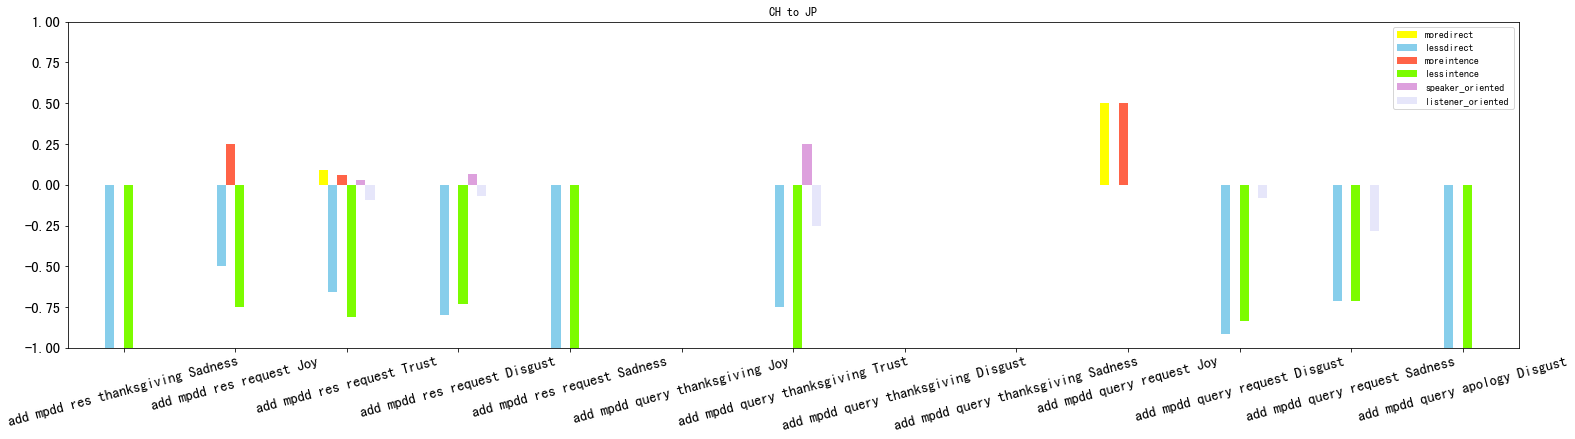

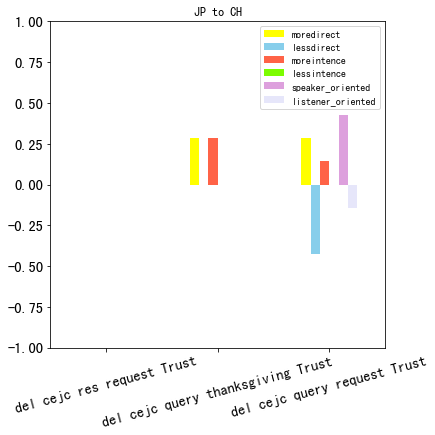

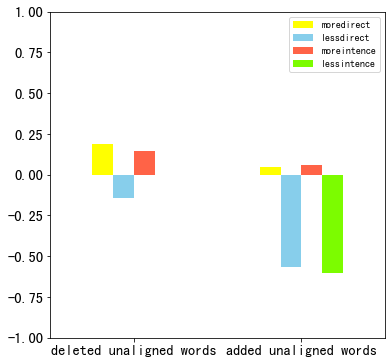

In [62]:
from IPython.display import display
sorted_sig_list = []
for i,l in enumerate(sig_list):
    sorted_sig_list.append([l[0],l[1],l[3],l[2],l[4]])

labeled_table_path = 'JIWC_diff_reason_table.csv'
columns_name=['diff_type','corpus','situation','sen_type','emotion','word','htmt','line','part','effect','direct','intence','perspective']
df = pd.read_csv(labeled_table_path, names=columns_name)

# REPLACE subordinate concept to MOREorLESS intencity
more =   ['lessdowngrader',
            'moreupgrader',
            'morespecific',
            'lessrespectful',
            'lesshumble',
            'add_expect_sth_in_return',
            'add_irony']
less = ['moredowngrader','lessspecific','lessupgrader','morerespectful','morehumble','rmv_expect_sth_in_return','rmv_irony']
for m, l in zip(more, less):
    df=df.replace(m,'moreintence')
    df=df.replace(l,'lessintence')
  
freq_df = pd.DataFrame()
miss_df = pd.DataFrame()
norm=False
for s in sig_list:
    diff_type=s[0]
    corpus=s[1]
    sen_type=s[2]
    situation=s[3]
    emotion=s[4]
#     diff_type='del'
#     corpus='cejc'
#     sen_type='query'
#     situation='request'
#     emotion='Trust'

    index_name='{} {} {} {} {}'.format(diff_type,corpus,sen_type,situation,emotion)
    emo_cond = df['diff_type'].isin([diff_type]) & df['corpus'].isin([corpus]) & df['sen_type'].isin([sen_type]) & df['situation'].isin([situation]) & df['emotion'].isin([emotion])
    gizamiss_cond = df['part'].isin(['gizamiss','labelmiss'])
    emo_df = df[emo_cond&~gizamiss_cond]
    # emo_df['word_count']=0
    effect_freq = emo_df.groupby(['effect'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
    direct_freq = emo_df.groupby(['direct'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
    intence_freq = emo_df.groupby(['intence'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
    perspective_freq = emo_df.groupby(['perspective'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
    tmp_df = effect_freq.join([direct_freq, intence_freq, perspective_freq])

    #     NORMALIZE
    tmp_df = tmp_df/emo_df['line'].count()
    norm=True
    
    freq_df=pd.concat([tmp_df, freq_df])
    
    nonrmv_emo_df =df[emo_cond]
    nonrmvmiss_freq = nonrmv_emo_df.groupby(['part'])['line'].count().sort_values(ascending=False).to_frame(name=index_name).T
#     NORMALIZE
    nonrmvmiss_freq = nonrmvmiss_freq/nonrmv_emo_df['line'].count()
    norm=True
    
    miss_df=pd.concat([miss_df, nonrmvmiss_freq])
freq_df=freq_df.reindex(columns=['noeffect','effect','noapology','norequest', 'nothanks', 'moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented'])
freq_df=freq_df.fillna(0)
# Less * -1
# print(freq_df[['lessdirect','lessintence','listener_oriented']]*-1)
freq_df[['lessdirect','lessintence','listener_oriented']]=freq_df[['lessdirect','lessintence','listener_oriented']]*-1
# plt.style.use('dark_background')
colorlist=['yellow','skyblue','tomato','lawngreen','plum','lavender']
if norm==True:
    freq_df[:-3][['moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented']].plot.bar(figsize=(26,6),ylim=(-1,1),color=colorlist,fontsize='x-large',rot=15,title="CH to JP")
    freq_df[-3:][['moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented']].plot.bar(figsize=(6,6),ylim=(-1,1),color=colorlist,fontsize='x-large',rot=15,title="JP to CH")
else:
    freq_df[:-3][['moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented']].plot.bar(figsize=(26,6),color=colorlist,fontsize='x-large',rot=15,title="CH to JP")
    freq_df[-3:][['moredirect','lessdirect','moreintence','lessintence','speaker_oriented','listener_oriented']].plot.bar(figsize=(6,6),color=colorlist,fontsize='x-large',rot=15,title="JP to CH")

d = freq_df[-3:][['moredirect','lessdirect','moreintence','lessintence']].mean().to_numpy()
a = freq_df[:-3][['moredirect','lessdirect','moreintence','lessintence']].mean().to_numpy()
# d = d/d.sum(axis=0,keepdims=1)
# a = a/a.sum(axis=0,keepdims=1)
print(d.sum())
print(a.sum())
display(pd.DataFrame([d,a]))
new=pd.DataFrame([d,a], index=["deleted unaligned words","added unaligned words"],columns=['moredirect','lessdirect','moreintence','lessintence'])
new.plot.bar(figsize=(6,6),ylim=(-1,1),color=colorlist,fontsize='x-large',stacked=False,rot=0)

1.0
1.0000000000000002


,0,1,2,3,4
0,0.166667,0.333333,0.0,0.261905,0.238095
1,0.116883,0.830087,0.0,0.053030,0.000000


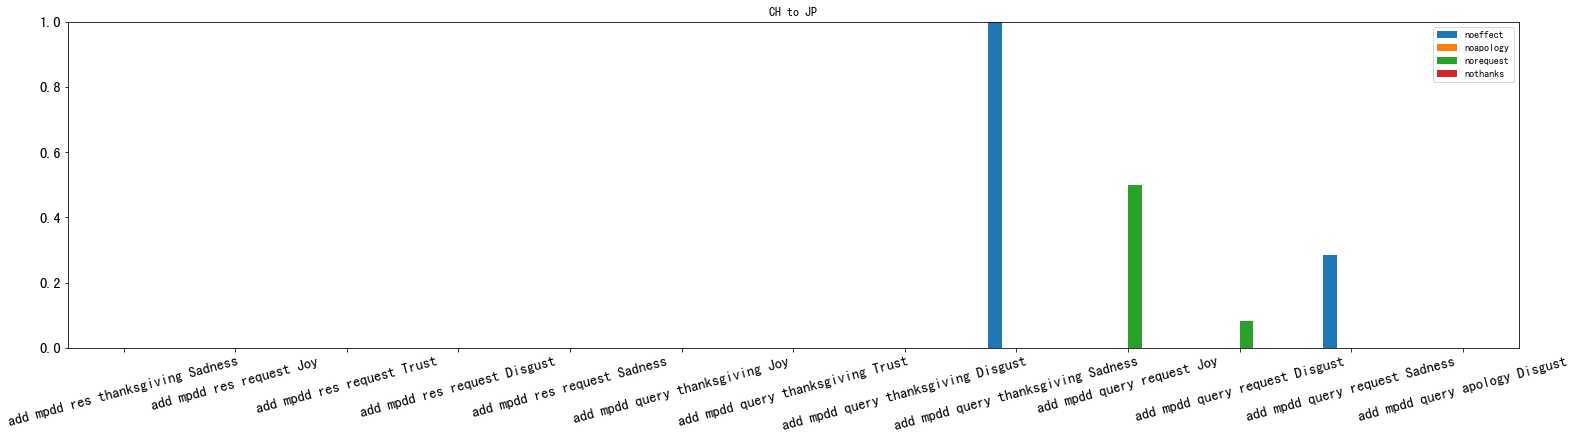

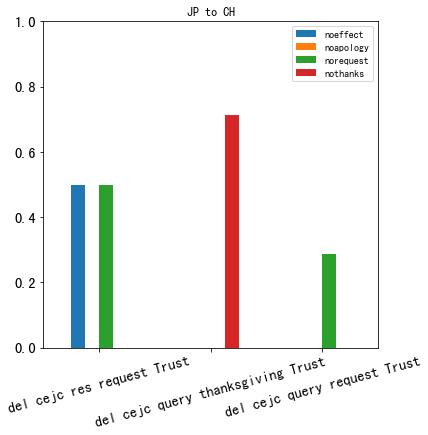

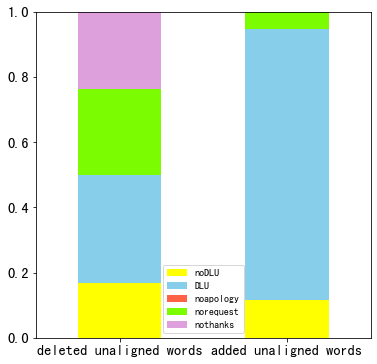

In [61]:
if norm==True:
    freq_df[:-3][['noeffect','noapology','norequest', 'nothanks']].plot.bar(figsize=(26,6),ylim=(0,1),fontsize='x-large',rot=15,title="CH to JP")
    freq_df[-3:][['noeffect','noapology','norequest', 'nothanks']].plot.bar(figsize=(6,6),ylim=(0,1),fontsize='x-large',rot=15,title="JP to CH")
else:
    freq_df[:-3][['noeffect','noapology','norequest', 'nothanks']].plot.bar(figsize=(26,6),fontsize='x-large',rot=15,title="CH to JP")
    freq_df[-3:][['noeffect','noapology','norequest', 'nothanks']].plot.bar(figsize=(6,6),fontsize='x-large',rot=15,title="JP to CH")

d = freq_df[-3:][['noeffect','effect','noapology','norequest', 'nothanks']].mean().to_numpy()
a = freq_df[:-3][['noeffect','effect','noapology','norequest', 'nothanks']].mean().to_numpy()
d = d/d.sum(axis=0,keepdims=1)
a = a/a.sum(axis=0,keepdims=1)
print(d.sum())
print(a.sum())
display(pd.DataFrame([d,a]))
new=pd.DataFrame([d,a], index=["deleted unaligned words","added unaligned words"],columns=['noDLU','DLU','noapology','norequest','nothanks'])
new.plot.bar(figsize=(6,6),ylim=(0,1),color=colorlist,fontsize='x-large',stacked=True,rot=0)

,labelmiss,gizamiss,headact,adjunct,other,response,segment
del cejc query request Trust,0.025000,0.800000,0.175000,0.000000,0.000000,0.000000,0.175000
del cejc query thanksgiving Trust,0.032258,0.741935,0.161290,0.000000,0.064516,0.000000,0.225806
del cejc res request Trust,0.000000,0.500000,0.000000,0.250000,0.250000,0.000000,0.500000
add mpdd query apology Disgust,0.000000,0.846154,0.000000,0.153846,0.000000,0.000000,0.153846
add mpdd query request Sadness,0.000000,0.837209,0.069767,0.093023,0.000000,0.000000,0.162791
add mpdd query request Disgust,0.006897,0.910345,0.034483,0.048276,0.000000,0.000000,0.082759
add mpdd query request Joy,0.000000,0.968750,0.031250,0.000000,0.000000,0.000000,0.031250
add mpdd query thanksgiving Sadness,0.000000,0.800000,0.000000,0.200000,0.000000,0.000000,0.200000
add mpdd query thanksgiving Disgust,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
add mpdd query thanksgiving Trust,0.000000,0.950617,0.012346,0.024691,0.012346,0.000000,0.049383


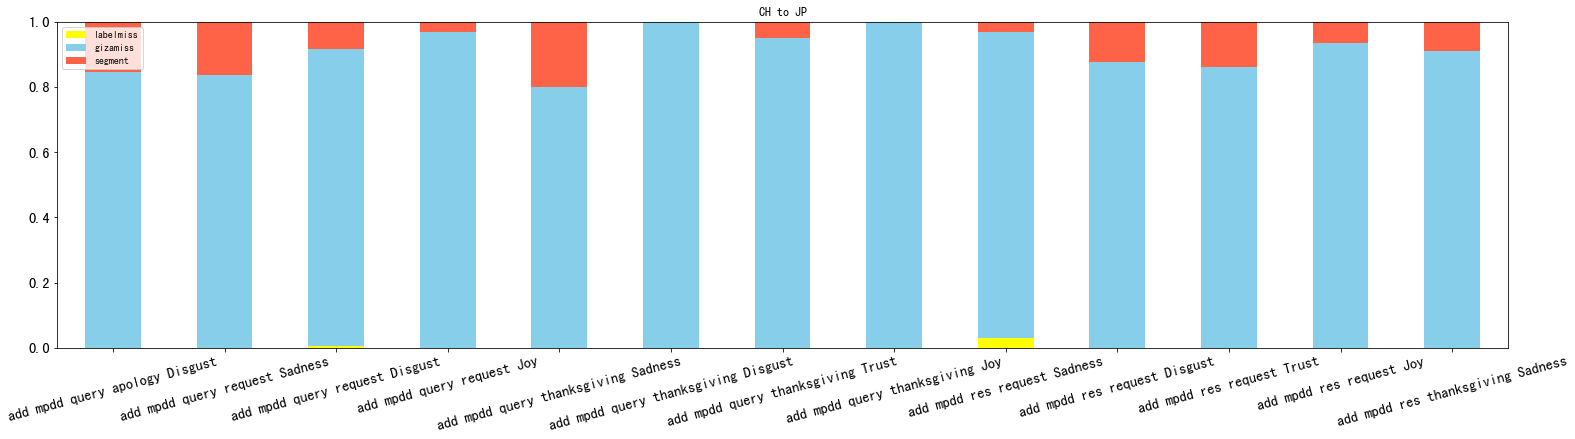

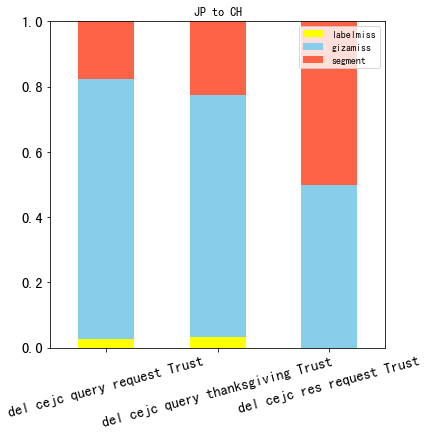

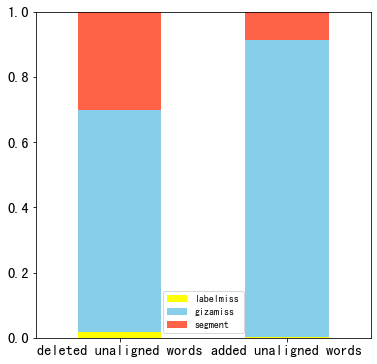

In [60]:
miss_df=miss_df.reindex(columns=segments)
miss_df['segment'] = miss_df['headact']+miss_df['adjunct']+miss_df['other']+miss_df['response']
display(miss_df)
miss_df=miss_df.fillna(0)
if norm==True:
    miss_df[3:][['labelmiss','gizamiss','segment']].plot.bar(figsize=(26,6),ylim=(0,1),color=colorlist,fontsize='x-large',stacked=True,rot=15,title="CH to JP")
    miss_df[:3][['labelmiss','gizamiss','segment']].plot.bar(figsize=(6,6),ylim=(0,1),color=colorlist,fontsize='x-large',stacked=True,rot=15,title="JP to CH")
else:
    miss_df[3:][['labelmiss','gizamiss','segment']].plot.bar(figsize=(26,6),color=colorlist,fontsize='x-large',stacked=True,rot=15,title="CH to JP")
    miss_df[:3][['labelmiss','gizamiss','segment']].plot.bar(figsize=(6,6),color=colorlist,fontsize='x-large',stacked=True,rot=15,title="JP to CH")
new=pd.DataFrame([miss_df[:3][['labelmiss','gizamiss','segment']].mean().to_list(),miss_df[3:][['labelmiss','gizamiss','segment']].mean().to_list()], index=["deleted unaligned words","added unaligned words"],columns=['labelmiss','gizamiss','segment'])
new.plot.bar(figsize=(6,6),ylim=(0,1),color=colorlist,fontsize='x-large',stacked=True,rot=0)

# show words ranking by freq

In [26]:
from IPython.display import display
sorted_sig_list = []
for i,l in enumerate(sig_list):
    sorted_sig_list.append([l[0],l[1],l[3],l[2],l[4]])

labeled_table_path = 'JIWC_diff_reason_table.csv'
columns_name=['diff_type','corpus','situation','sen_type','emotion','word','htmt','line','part','effect','direct','intence','perspective']
df = pd.read_csv(labeled_table_path, names=columns_name)

# REPLACE subordinate concept to MOREorLESS intencity
more =   ['lessdowngrader',
            'moreupgrader',
            'morespecific',
            'lessrespectful',
            'lesshumble',
            'add_expect_sth_in_return',
            'add_irony']
less = ['moredowngrader','lessspecific','lessupgrader','morerespectful','morehumble','rmv_expect_sth_in_return','rmv_irony']
for m, l in zip(more, less):
    df=df.replace(m,'moreintence')
    df=df.replace(l,'lessintence')
# pd.set_option('display.min_rows', 100)
# print(df)
# pprint(sorted_sig_list)

for s in sig_list:
    diff_type=s[0]
    corpus=s[1]
    sen_type=s[2]
    situation=s[3]
    emotion=s[4]
    
    print('#'*50)
    print("######## {} {} {} {} {} ########".format(diff_type,corpus,sen_type,situation,emotion))
    print('#'*50)

    emo_cond = df['diff_type'].isin([diff_type]) & df['corpus'].isin([corpus]) & df['sen_type'].isin([sen_type]) & df['situation'].isin([situation]) & df['emotion'].isin([emotion])
    gizamiss_cond = df['part'].isin(['gizamiss','labelmiss'])
    emo_df = df[emo_cond&~gizamiss_cond]
    emo_df
    word_freq = emo_df.groupby(['word'])['line'].count().sort_values(ascending=False)
    print('[word_freq]')
    print(word_freq)
    print()
#     word_freq = emo_df.groupby(['word','part'])['line'].count().sort_values(ascending=False)
#     print('[word_freq part]')
#     print(word_freq)
#     print()
#     word_freq = emo_df.groupby(['word','part','effect'])['line'].count().sort_values(ascending=False)
#     print('[word_freq effect]')
#     print(word_freq)
#     print()
#     word_freq = emo_df.groupby(['word','part','direct'])['line'].count().sort_values(ascending=False)
#     print('[word_freq direct]')
#     print(word_freq)
#     print()
#     word_freq = emo_df.groupby(['word','part','intence'])['line'].count().sort_values(ascending=False)
#     print('[word_freq intece]')
#     print(word_freq)
#     print()
#     word_freq = emo_df.groupby(['word','part','perspective'])['line'].count().sort_values(ascending=False)
#     print('[word_freq perspective]')
#     print(word_freq)
#     print()


##################################################
######## del cejc query request Trust ########
##################################################
[word_freq]
word
願い     5
考えて    1
あり     1
Name: line, dtype: int64

##################################################
######## del cejc query thanksgiving Trust ########
##################################################
[word_freq]
word
あり    5
ない    2
Name: line, dtype: int64

##################################################
######## del cejc res request Trust ########
##################################################
[word_freq]
word
願い    1
誰     1
Name: line, dtype: int64

##################################################
######## add mpdd query apology Disgust ########
##################################################
[word_freq]
word
風    1
手    1
Name: line, dtype: int64

##################################################
######## add mpdd query request Sadness ########
##################################################
[wo